<a href="https://colab.research.google.com/github/tarikaytek/tensorflow-developer-professional-certificate/blob/main/C2W1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#downloading the dataset
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-10-14 21:45:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  73.3MB/s    in 0.9s    

2022-10-14 21:45:40 (73.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# unzipping 
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#training set
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#test set
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
#numberssss
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255.)
test_datagen = ImageDataGenerator(rescale=1. / 255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,
                    verbose=2)

Epoch 1/15
100/100 - 17s - loss: 0.7704 - accuracy: 0.5645 - val_loss: 1.2922 - val_accuracy: 0.5000 - 17s/epoch - 174ms/step
Epoch 2/15
100/100 - 8s - loss: 0.6453 - accuracy: 0.6660 - val_loss: 0.6489 - val_accuracy: 0.6210 - 8s/epoch - 81ms/step
Epoch 3/15
100/100 - 8s - loss: 0.5597 - accuracy: 0.7170 - val_loss: 0.5981 - val_accuracy: 0.6900 - 8s/epoch - 80ms/step
Epoch 4/15
100/100 - 8s - loss: 0.4950 - accuracy: 0.7610 - val_loss: 0.9379 - val_accuracy: 0.5530 - 8s/epoch - 81ms/step
Epoch 5/15
100/100 - 8s - loss: 0.4225 - accuracy: 0.8110 - val_loss: 0.5873 - val_accuracy: 0.7350 - 8s/epoch - 81ms/step
Epoch 6/15
100/100 - 8s - loss: 0.3296 - accuracy: 0.8545 - val_loss: 0.6281 - val_accuracy: 0.7170 - 8s/epoch - 84ms/step
Epoch 7/15
100/100 - 8s - loss: 0.2432 - accuracy: 0.8965 - val_loss: 0.8252 - val_accuracy: 0.7020 - 8s/epoch - 82ms/step
Epoch 8/15
100/100 - 8s - loss: 0.1738 - accuracy: 0.9295 - val_loss: 0.8962 - val_accuracy: 0.7060 - 8s/epoch - 81ms/step
Epoch 9/15
10

Text(0.5, 1.0, 'Training and validation loss')

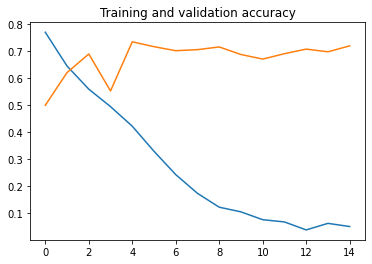

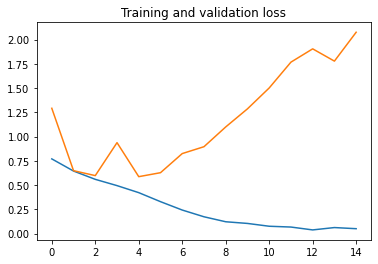

In [9]:
import matplotlib.pyplot as plt

#observing accuracy and loss 

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot  (epochs, loss)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss')

In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)